<h1>All Respondents Analysis</h1>

<h2>Load all data</h2>

In [74]:
import os
import pandas as pd

# Specify the folder path where the CSV files are located
folder_path = "all respondents data"

# Initialize an empty dataframe to store the combined data
combined_data = pd.DataFrame()

# Loop through each file in the folder with .csv extension and append to the combined_data dataframe
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, low_memory=False)
        respondent_num = filename.split('_')[0]  # Get the first part of the filename before the first '_'
        df['Respondent'] = respondent_num  # Add a new column with the respondent number
        combined_data = pd.concat([combined_data, df])

columns_to_remove = ['Row','Timestamp','EventSource','SlideEvent','StimType','Duration',
                     'CollectionPhase','SourceStimuliName','EventSource','SampleNumber','EventSource.1',
                     'Blink', 'BlinkRate', 'EventSource.2', 'ET_TimeSignal', 'EventSource.3']
combined_data.drop(columns_to_remove, axis=1, inplace=True)

# Print the combined data
print(combined_data)


           Anger  Contempt   Disgust      Fear       Joy   Sadness  Surprise  \
0            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
147733       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
147734  0.195341  0.187637  0.027562  0.130503  0.043328  0.117269  0.057809   
147735  0.245047  0.204197  0.028027  0.133038  0.041089  0.118906  0.057576   
147736       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
147737       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        Engagement  Valence  Sentimenta

In [75]:
print(combined_data.columns)

Index(['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise',
       'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Pitch', 'Yaw', 'Roll',
       'Interocular Distance', 'ET_PupilLeft', 'ET_PupilRight',
       'ET_DistanceLeft', 'ET_DistanceRight', 'ET_GazeLeftx', 'ET_GazeLefty',
       'ET_GazeRightx', 'ET_GazeRighty', 'ET_ValidityLeftEye',
       'ET_ValidityRightEye', 'ET_CameraLeftX', 'ET_CameraLeftY',
       'ET_CameraRightX', 'ET_CameraRightY', 'Gaze X', 'Gaze Y',
       'Interpolated Gaze X', 'Interpolated Gaze Y', 'Interpolated Distance',
       'Gaze Velocity', 'Gaze Acceleration', 'Fixation Index',
       'Fix

<h2>Facial Expressions Analysis</h2>

<h3>Data Pre-processing</h3>

In [83]:
import pandas as pd

facial_expressions_columns = ['Respondent', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise',
       'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Pitch', 'Yaw',
       'Roll']
# Creating a copy df with only the facial expressions data
facial_expressions_data = combined_data[facial_expressions_columns].copy()

# Remove rows with all NaN values, except in the 'Respondent' column
facial_expressions_data = facial_expressions_data.dropna(how='all', 
                                                         subset=facial_expressions_data.columns.difference(['Respondent']))

facial_expressions_data.head()



,Respondent,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,...,Lip Suck,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Pitch,Yaw,Roll
5,001,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,0.055428,0.328766,0.0,...,0.000806,0.002685,0.027488,0.008689,0.443331,0.0,0.000345,6.757946,-1.150817,-0.977193
7,001,0.125833,0.186909,0.023738,0.126169,0.025312,0.125694,0.055510,0.328766,0.0,...,0.002314,0.002068,0.027396,0.013201,0.406091,0.0,0.000376,3.458502,-0.160348,0.267830
9,001,0.126258,0.187818,0.023798,0.126605,0.025114,0.125970,0.055607,0.328766,0.0,...,0.003132,0.002222,0.030377,0.019631,0.341483,0.0,0.000493,3.753664,-0.737176,0.388438
11,001,0.126290,0.188413,0.023834,0.126583,0.024996,0.126124,0.055529,0.328766,0.0,...,0.003382,0.002643,0.029414,0.022291,0.300317,0.0,0.000636,4.180299,-0.449494,0.456045
13,001,0.126344,0.188792,0.023866,0.126641,0.024909,0.126202,0.055519,0.328766,0.0,...,0.003895,0.002665,0.025747,0.033456,0.273545,0.0,0.000934,4.626769,-0.389839,0.613328


<h3>Calculate Statistics</h3>

In [84]:
facial_expressions_data.describe()

,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,...,Lip Suck,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Pitch,Yaw,Roll
count,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,...,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000
mean,1.789210,1.859828,0.560793,1.427717,1.664313,1.078596,1.481581,26.342286,-1.243809,1.123377,...,6.418785,1.815170,32.707067,0.847484,2.944674,3.564589,2.571804,-5.351897,-1.450593,1.056373
std,6.404628,10.485240,4.022705,6.178375,11.907768,5.106507,7.925603,33.628131,16.496304,5.272043,...,20.978138,8.159653,40.121276,3.890346,12.784691,12.460892,9.818373,10.180762,7.592957,4.372582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.746422,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.126274,-69.441238,-34.569847
25%,0.139561,0.187831,0.024912,0.136987,0.024135,0.125867,0.057255,0.328766,0.000000,0.014853,...,0.000814,0.005358,0.281566,0.016475,0.006056,0.002832,0.001761,-12.457028,-4.872414,-1.395715
50%,0.278667,0.194114,0.040634,0.227486,0.024495,0.128685,0.067624,1.717079,0.000000,0.077267,...,0.014712,0.043516,6.130017,0.080120,0.053411,0.070087,0.030536,-4.817038,-0.882336,0.920036
75%,1.191851,0.231713,0.421217,0.911785,0.026266,0.151988,0.205272,60.522987,0.000000,0.367645,...,0.413520,0.328920,77.487244,0.383637,0.411084,0.633370,0.471519,1.575253,2.286757,3.889163
max,97.433800,99.885056,99.332336,99.734726,99.979660,99.033897,99.988937,99.981064,99.967102,99.858139,...,100.000000,99.997185,100.000000,99.951042,100.000000,99.603455,99.996376,43.438602,48.829636,40.203255


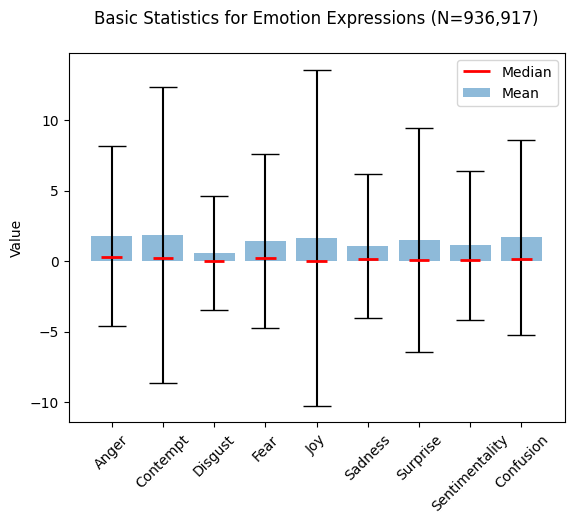

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate statistics for the selected columns
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Confusion']
stats = facial_expressions_data[selected_columns].describe()

# Extract the mean and standard deviation values
mean_values = stats.loc['mean']
std_values = stats.loc['std']
median_values = stats.loc['50%']

# Create a bar chart of the mean values, with error bars representing the standard deviation
x_labels = selected_columns
x_pos = np.arange(len(x_labels))
fig, ax = plt.subplots()
ax.bar(x_pos, mean_values, yerr=std_values, align='center', alpha=0.5, ecolor='black', capsize=10, label='Mean')
ax.hlines(median_values, x_pos - 0.2, x_pos + 0.2, colors='red', linewidth=2, label='Median')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylabel('Value')
# ax.set_title('Basic Statistics for Emotion Expressions (N=' + str(len(facial_expressions_data)) + ')\n')
ax.set_title('Basic Statistics for Emotion Expressions (N={:,})\n'.format(len(facial_expressions_data)))
ax.legend()

# Show the chart
plt.show()

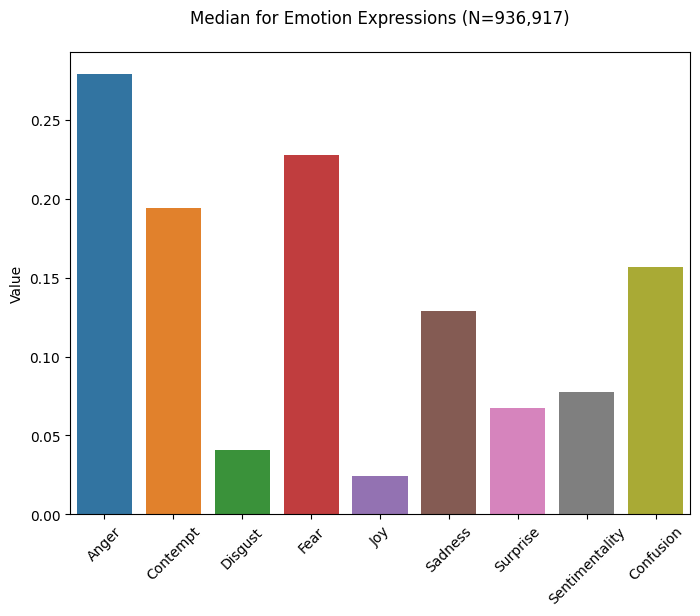

In [86]:
import seaborn as sns

# Set the figure size to (8, 6) inches
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar plot of the median values
sns.barplot(x=median_values.index, y=median_values.values, ax=ax)

# Set the x-axis label rotation to 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Set the plot title and axis labels
plt.title('Median for Emotion Expressions (N={:,})\n'.format(len(facial_expressions_data)))
plt.ylabel('Value')

# Show the plot
plt.show()

<h2>Per Respondent Analysis</h2>

In [87]:
import pandas as pd

# Loop over the unique values in the 'Respondent' column and calculate the statistics for each respondent
for respondent_id in facial_expressions_data['Respondent'].unique():
    # Filter the data to include only the rows for the current respondent
    respondent_data = facial_expressions_data[facial_expressions_data['Respondent'] == respondent_id]
    # Calculate the statistics for the selected columns in the filtered data
    respondent_stats = respondent_data[selected_columns].describe()
    # Print the statistics dataframe for the current respondent
    print(respondent_stats)


              Anger      Contempt       Disgust          Fear           Joy  \
count  79345.000000  79345.000000  79345.000000  79345.000000  79345.000000   
mean       1.178749      0.236420      0.376627      1.479852      5.937353   
std        3.338498      2.155168      3.247520      5.349511     22.369736   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.141558      0.151043      0.024630      0.138986      0.024360   
50%        0.246804      0.187501      0.031779      0.235411      0.025323   
75%        0.923253      0.192106      0.123546      0.839612      0.033621   
max       94.093216     97.368004     93.648643     95.832893     99.979645   

            Sadness      Surprise  Sentimentality     Confusion  
count  79345.000000  79345.000000    79345.000000  79345.000000  
mean       0.285892      0.686932        1.306198      0.467868  
std        2.558369      4.342761        5.764883      3.648233  
min        0.000000     

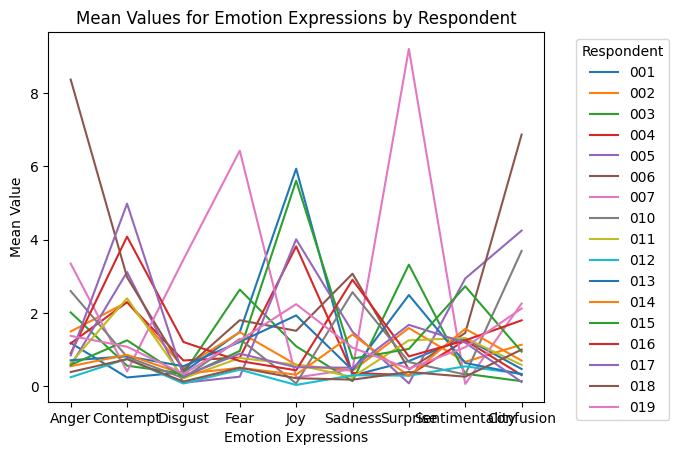

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the relevant columns in the data
selected_data = facial_expressions_data[['Respondent'] + selected_columns]

# Group the data by respondent and calculate the mean values for each column
respondent_means = selected_data.groupby('Respondent').mean()

# Plot the mean values for each respondent for the selected columns as a line plot
respondent_means.T.plot()
plt.xlabel('Emotion Expressions')
plt.ylabel('Mean Value')
plt.title('Mean Values for Emotion Expressions by Respondent')
plt.legend(title='Respondent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


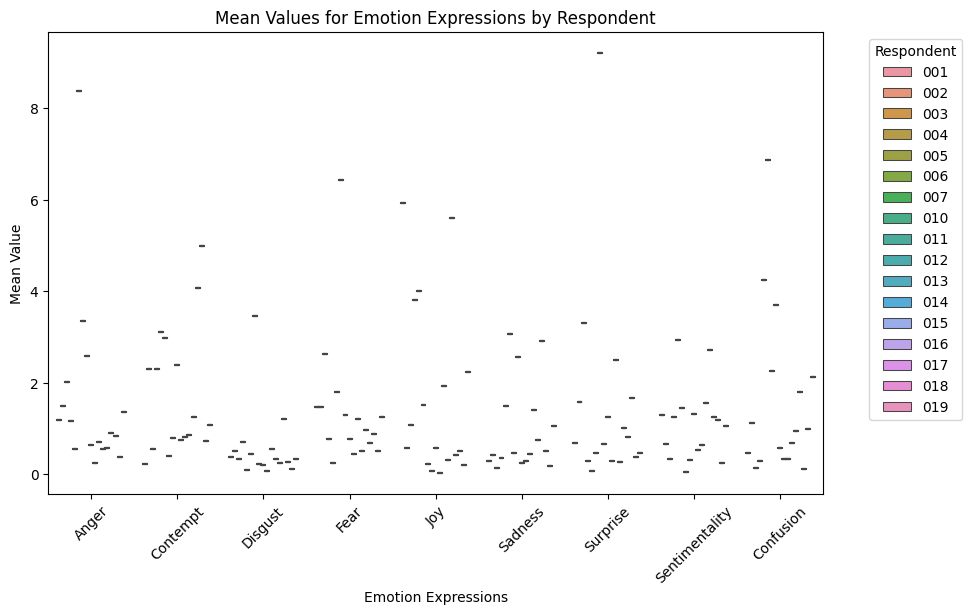

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the relevant columns in the data
selected_data = facial_expressions_data[['Respondent'] + selected_columns]

# Group the data by respondent and calculate the mean values for each column
respondent_means = selected_data.groupby('Respondent').mean()

# Convert the mean values for each column to a dataframe and melt it
melted_data = respondent_means.reset_index().melt(id_vars='Respondent', var_name='Emotion Expression', value_name='Mean Value')

# Create a box plot of the mean values for each respondent and selected columns
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.boxplot(data=melted_data, x='Emotion Expression', y='Mean Value', hue='Respondent')
plt.xlabel('Emotion Expressions')
plt.ylabel('Mean Value')
plt.title('Mean Values for Emotion Expressions by Respondent')
plt.legend(title='Respondent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


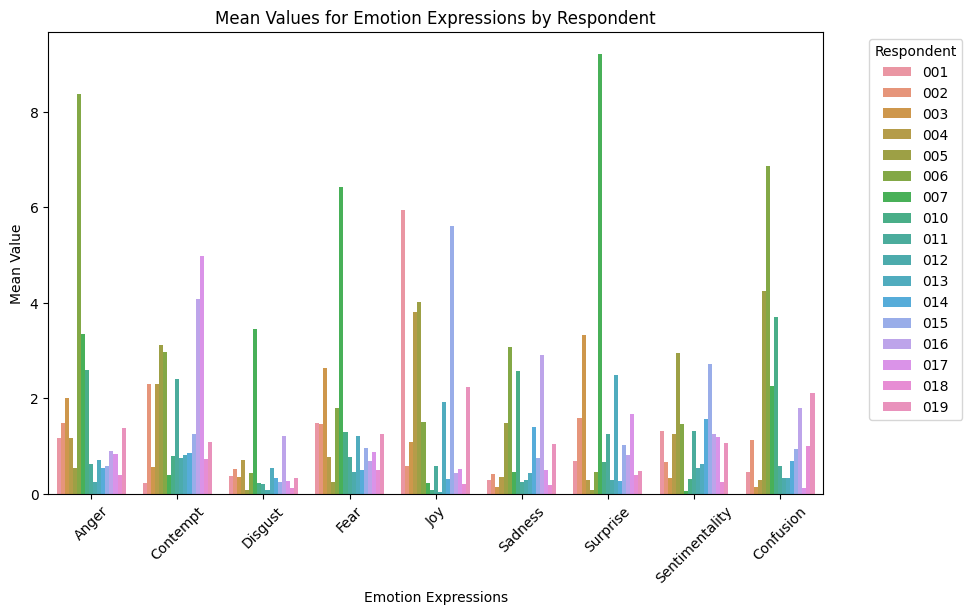

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the relevant columns in the data
selected_data = facial_expressions_data[['Respondent'] + selected_columns]

# Group the data by respondent and calculate the mean values for each column
respondent_means = selected_data.groupby('Respondent').mean()

# Convert the mean values for each column to a dataframe and melt it
melted_data = respondent_means.reset_index().melt(id_vars='Respondent', var_name='Emotion Expression', value_name='Mean Value')

# Create a grouped bar plot of the mean values for each respondent and selected columns
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(data=melted_data, x='Emotion Expression', y='Mean Value', hue='Respondent', errorbar=None)
plt.xlabel('Emotion Expressions')
plt.ylabel('Mean Value')
plt.title('Mean Values for Emotion Expressions by Respondent')
plt.legend(title='Respondent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


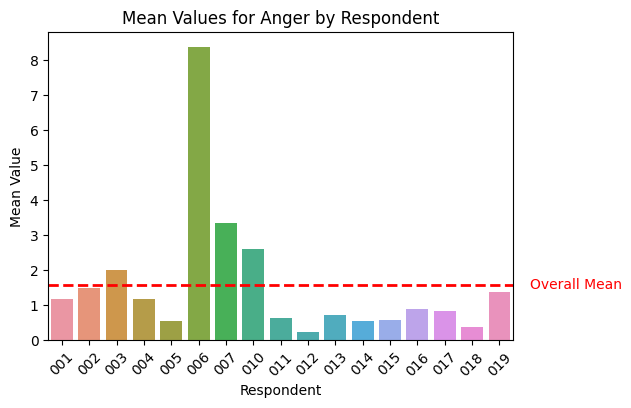

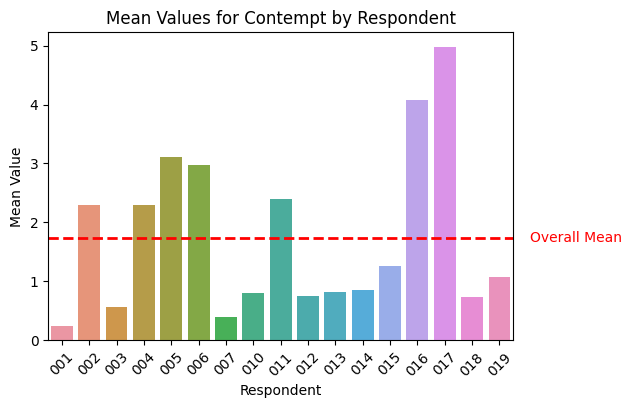

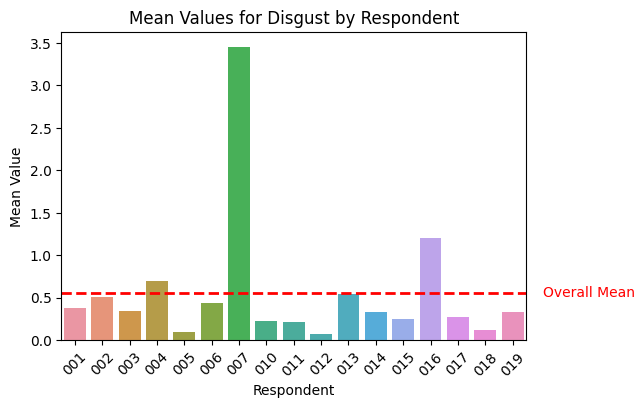

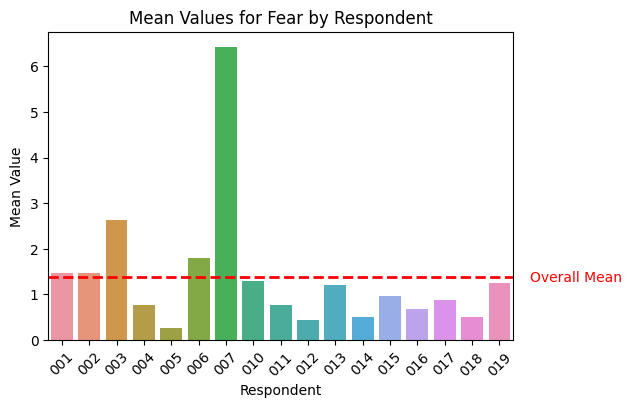

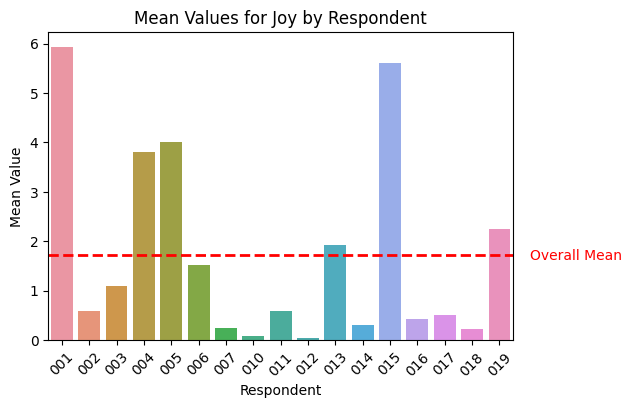

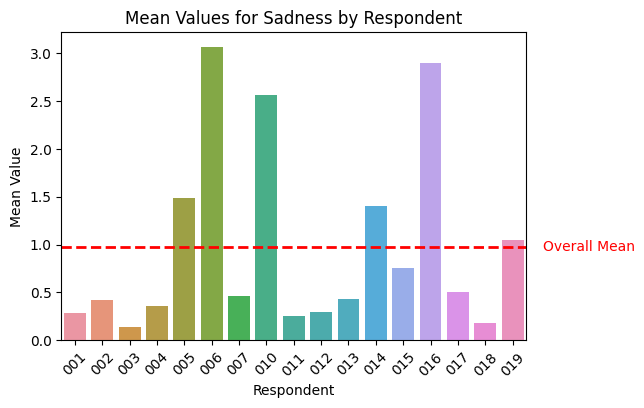

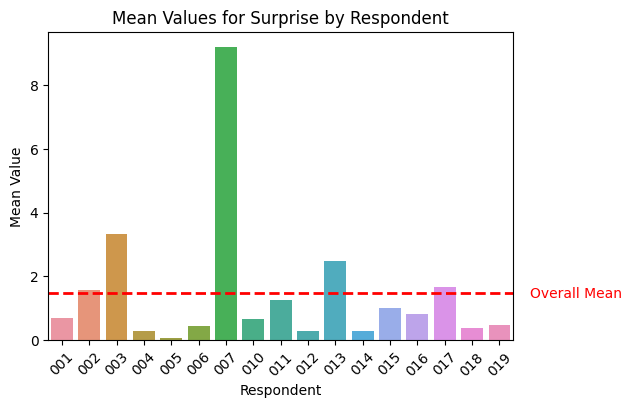

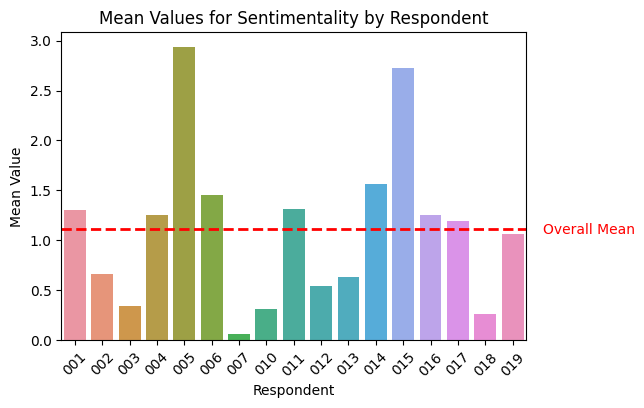

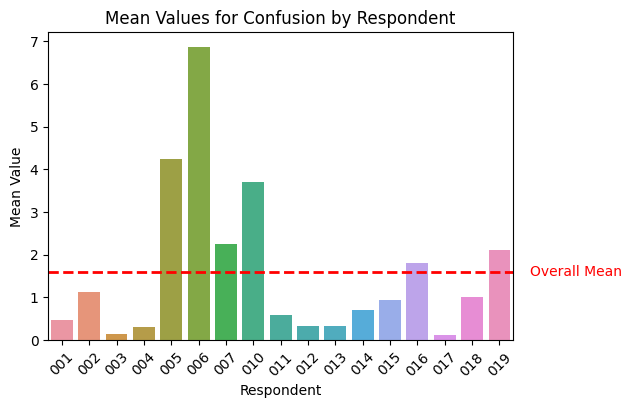

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the relevant columns in the data
selected_data = facial_expressions_data[['Respondent'] + selected_columns]

# Group the data by respondent and calculate the mean values for each column
respondent_means = selected_data.groupby('Respondent').mean()

# Convert the mean values for each column to a dataframe and melt it
melted_data = respondent_means.reset_index().melt(id_vars='Respondent', var_name='Emotion Expression', value_name='Mean Value')

# Calculate the overall mean value for each emotion expression
overall_mean_values = melted_data.groupby('Emotion Expression')['Mean Value'].mean().to_dict()

# Create a separate figure for each emotion expression
for emotion in selected_columns:
    # Create a subset of the melted data for the current emotion expression
    subset_data = melted_data[melted_data['Emotion Expression'] == emotion]

    # Create a grouped bar plot of the mean values for each respondent for the current emotion expression
    plt.figure(figsize=(6,4))
    plt.xticks(rotation=45)
    sns.barplot(data=subset_data, x='Respondent', y='Mean Value', errorbar=None)
    plt.xlabel('Respondent')
    plt.ylabel('Mean Value')
    plt.title('Mean Values for {} by Respondent'.format(emotion))
    
    # Add a horizontal line plot of the overall mean value for the current emotion expression
    overall_mean = overall_mean_values[emotion]
    plt.axhline(overall_mean, color='red', linestyle='dashed', linewidth=2)
    plt.text(len(subset_data['Respondent']) + 0.1, overall_mean, 'Overall Mean', ha='left', va='center', color='red')
    
    plt.show()


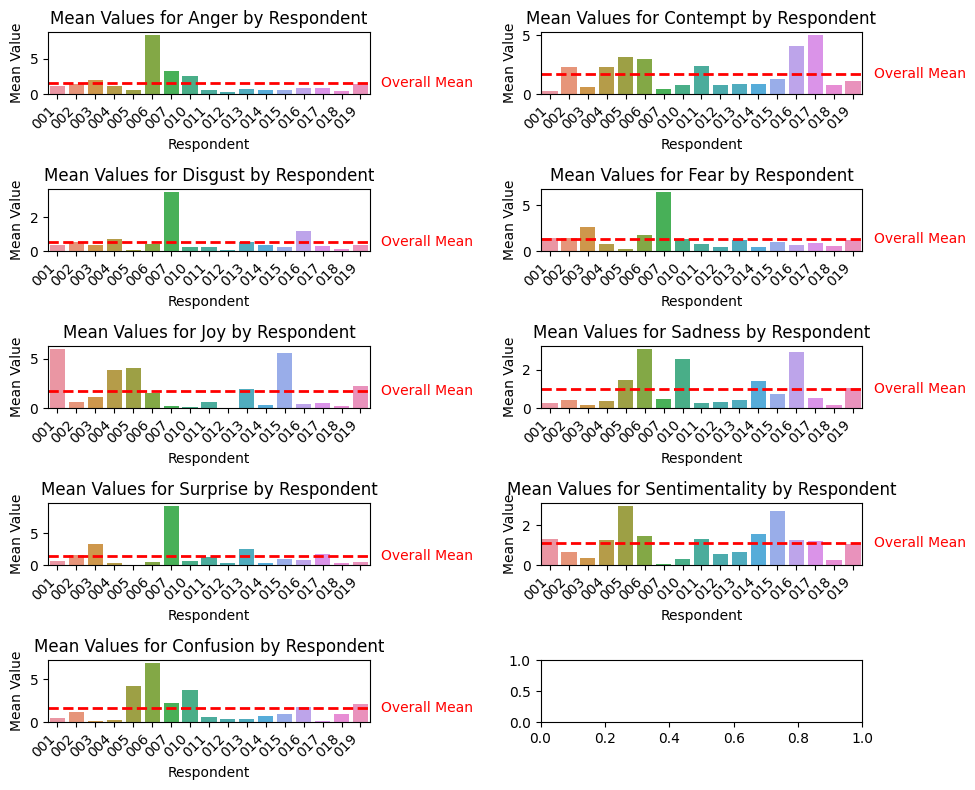

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the relevant columns in the data
selected_data = facial_expressions_data[['Respondent'] + selected_columns]

# Group the data by respondent and calculate the mean values for each column
respondent_means = selected_data.groupby('Respondent').mean()

# Convert the mean values for each column to a dataframe and melt it
melted_data = respondent_means.reset_index().melt(id_vars='Respondent', var_name='Emotion Expression', value_name='Mean Value')

# Calculate the overall mean value for each emotion expression
overall_mean_values = melted_data.groupby('Emotion Expression')['Mean Value'].mean().to_dict()

# Calculate the number of rows and columns for the subplots
n_rows = int((len(selected_columns) - 1) / 2) + 1
n_cols = min(len(selected_columns), 2)

# Create a new figure with multiple subplots for each emotion expression
# Create a new figure with multiple subplots for each emotion expression
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 8))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over the emotion expressions and plot each one in a separate subplot
for i, emotion in enumerate(selected_columns):
    # Create a subset of the melted data for the current emotion expression
    subset_data = melted_data[melted_data['Emotion Expression'] == emotion]

    # Plot the mean values for each respondent for the current emotion expression
    sns.barplot(data=subset_data, x='Respondent', y='Mean Value', errorbar=None, ax=axs[i])
    axs[i].set_xlabel('Respondent')
    axs[i].set_ylabel('Mean Value')
    axs[i].set_title('Mean Values for {} by Respondent'.format(emotion))
    
    # Add a horizontal line plot of the overall mean value for the current emotion expression
    overall_mean = overall_mean_values[emotion]
    axs[i].axhline(overall_mean, color='red', linestyle='dashed', linewidth=2)
    axs[i].text(len(subset_data['Respondent']) + 0.1, overall_mean, 'Overall Mean', ha='left', va='center', color='red')

    # Rotate the x-axis labels
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()



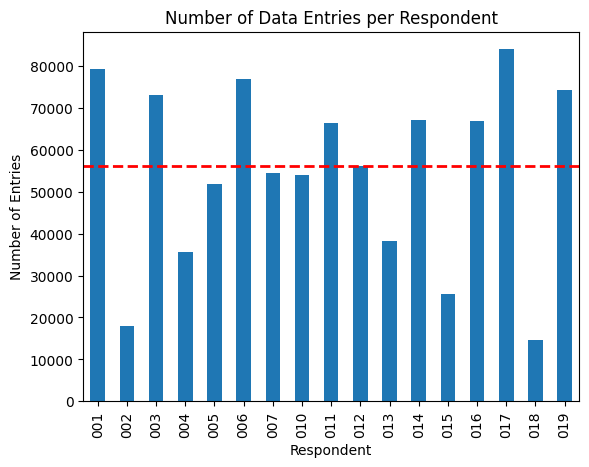

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'facial_expressions_data'
# Count the number of rows for each respondent
respondent_counts = facial_expressions_data['Respondent'].value_counts()

# Get the median count for all respondents
median_count = respondent_counts.median()

# Plot the counts for each respondent as a bar plot
sorted_counts = respondent_counts.sort_index()
sorted_counts.plot.bar(x=sorted_counts.index.astype(str), y='Number of Rows')

# Add a line plot of the median count for all respondents
plt.axhline(median_count, color='red', linestyle='dashed', linewidth=2)

plt.xlabel('Respondent')
plt.ylabel('Number of Entries')
plt.title('Number of Data Entries per Respondent')

plt.show()

